<a href="https://colab.research.google.com/github/aghaeifar/SpinWalk/blob/main/demo/spinwalk_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



If running this demo in Google Colab, **Switch to GPU**:



*   Go to Edit → Notebook Settings
*   Choose GPU from Hardware Accelerator






# Installing SpinWalk


In [ ]:
%%bash
# install dependencies
apt-get install -y libboost-all-dev libhdf5-dev libtbb-dev

# clone SpinWalk
rm -rf SpinWalk
git clone --depth 1 https://github.com/aghaeifar/SpinWalk.git &> /dev/null

# build it
cd SpinWalk
cmake -B ./build
cmake --build ./build --config Release
cmake --install ./build

Reading package lists...
Building dependency tree...
Reading state information...
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
libtbb-dev is already the newest version (2021.5.0-7ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
-- CMake version: 3.30.1
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found HDF5: /usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5_cpp.so;/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5.so;/usr/lib/x8

In [1]:
%%bash
# test it runs and show help menu
echo "Running SpinWalk..."
spinwalk 

# show version
echo e "Print SpinWalk version..."
spinwalk --version

# print gpu info if available - note this command won't work if spinwalk is compiled without CUDA support
echo -e "\nPrint GPU info..."
spinwalk --gpu_info

Running SpinWalk...
Usage: spinwalk [OPTIONS] [SUBCOMMAND]

Options:
  -h,--help                             Print this help message and exit
  -v,--version                          Display program version information and exit
  -g,--gpu_info                         Print GPU information

Subcommands:
  sim                                   Run Monte-Carlo simulation
  phantom                               Generate numerical phantom
  config                                Generate configuration file
  diff_grad                             Generate diffusion gradient table

e Print SpinWalk version...
1.16.0

Print GPU info...
Driver version: 12060, CUDA version: 12060
Number of devices: 1
NVIDIA RTX A4000
-Compute Capability: 8.6
-Free GPU Memory: 14636 MB (out of 16002 MB)


# Generating Phantom

Here, **SpinWalk** generates phantoms containing cylinders with a radius of 8 µm, mimicking vessels with oxygeneation level of 78% and 85%. These cylinders will occupy 4% of the total volume, and the phantom will have a field of view (FoV) of 600 µm. The phantom will be stored in the `phantoms` folder.

In [2]:
%%bash
echo "Print help menu for phantom generation..."
spinwalk phantom -h

Print help menu for phantom generation...
Generate numerical phantom
Usage: spinwalk phantom [OPTIONS]

Options:
  -h,--help                             Print this help message and exit
  -c,--cylinder                         Fill phantom with cylinders
  -s,--sphere                           Fill phantom with spheres
  -r,--radius FLOAT [50]                Radius of the cylinders/spheres in µm (negative value = random radius)
  -n,--orientation FLOAT [90]           Orientation of the cylinders in degree with respect to B0
  -v,--volume_fraction FLOAT [4]        Fraction of shapes volume to FoV volume in % <0.0 100.0>
  -f,--fov FLOAT:POSITIVE               Voxel field of view in µm (isotropic)
  -z,--resolution UINT:POSITIVE         Base resolution
  -d,--dchi FLOAT [1.1e-07]             Susceptibility difference between fully deoxygenated blood and tissue (default: 0.11e-6 in cgs units)
  -y,--oxy_level FLOAT [0.75]           Blood oxygenetation level <0.0 1.0> (-1 = exclude off-reso

In [ ]:
%%bash
# Define the output directory
output_dir="./phantoms"
mkdir -p "$output_dir"

vol_frac=4
oxy_level_act=0.85
oxy_level_rest=0.78
dChi=0.00000011
orientation=90
resolution=600
fov=600
radius=8

# Define the output file
output_file_rest="${output_dir}/r${radius}_Y${oxy_level_rest}_vf${vol_frac}_ori${orientation}_fov${fov}_res${resolution}.h5"
# Call the command with the variable parameter and redirect the output
spinwalk phantom -c -r "$radius" -v "$vol_frac" -f "$fov" -z "$resolution" -d "$dChi" -y "$oxy_level_rest" -n "$orientation" -e 0 -o "$output_file_rest"

# Define the output file
output_file_act="${output_dir}/r${radius}_Y${oxy_level_act}_vf${vol_frac}_ori${orientation}_fov${fov}_res${resolution}.h5"
# Call the command with the variable parameter and redirect the output
spinwalk phantom -c -r "$radius" -v "$vol_frac" -f "$fov" -z "$resolution" -d "$dChi" -y "$oxy_level_act" -n "$orientation" -e 0 -o "$output_file_act"

# check phantoms are there
echo -e "\nList of existing phantoms in phantom folder..."
ls -l --block-size=M ./phantoms


 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.16.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Generating cylinder phantom...


Generating (1/2) 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100/100 
Generating (2/2) 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75/75 
Done.
 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.16.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Generating cylinder phantom...
Generating (1/2) 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100/100 
Generating (2/2) 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75/75 
Done.

Shiw directory content...
total 2060M
-rw-r--r-- 1 aaghaeifar kyb 1030M Dez  8 20:51 r8_Y0.78_vf4_ori90_fov600_res600.h5
-rw-r--r-- 1 aaghaeifar kyb 1030M Dez  8 20:53 r8_Y0.85_vf4_ori90_fo

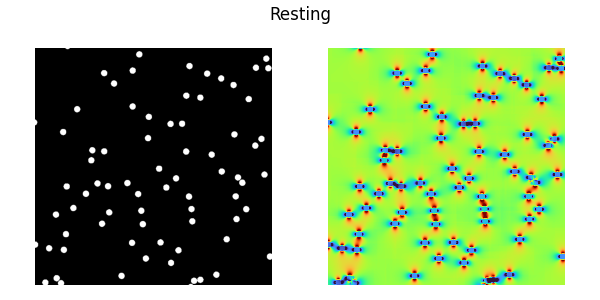

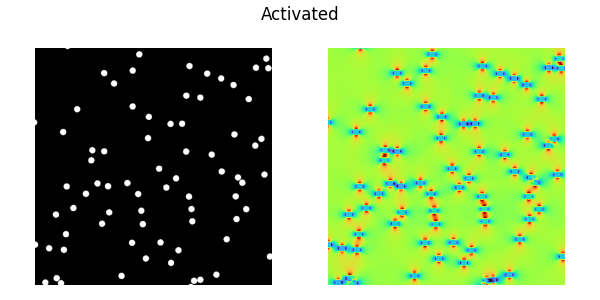

In [4]:
%matplotlib widget
# plot the generated phantoms
import h5py
import matplotlib.pyplot as plt

def plot_phantom(file_path, title=None):
    with h5py.File(file_path, "r") as f:
        mask = f["mask"][()]
        fieldmap = f["fieldmap"][()]
        sz = tuple(dim // 2 for dim in mask.shape)
        # print orthogonal views
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))
        axes[0].imshow(mask[:, :, sz[2]], cmap="gray")
        axes[0].axis("off")
        axes[1].imshow(fieldmap[:, :, sz[2]], cmap="turbo", vmin=-8e-8, vmax=8e-8)
        axes[1].axis("off")
        # title
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

# show the phantom
output_file_rest = "./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5"
output_file_act  = "./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5"
plot_phantom(output_file_rest, title="Resting")
plot_phantom(output_file_act, title="Activated")

# Creating Configuration File

In [5]:
%%bash
# help menu for generating config file
spinwalk config -h

Generate configuration file
Usage: spinwalk config [OPTIONS]

Options:
  -h,--help                             Print this help message and exit
  -s,--seq_name TEXT                    Sequence name: GRE, SE, bSSFP, default
  -p,--phantoms TEXT:FILE ...           Path to phantom files as many as you want. e.g. -p phantom1.h5 phantom2.h5 ... phantomN.h5
  -e,--TE UINT:POSITIVE                 Echo time in µs
  -t,--timestep UINT:POSITIVE           timestep in µs
  -o,--output TEXT                      Path to save the configuration file


Generate a configuration file to save the FoV scaling factor, as it is not automatically produced by SpinWalk in the subsequent step.

In [24]:
%%writefile scales.ini
[GENERAL]
PARENT_CONFIG = default_config.ini 

[SIMULATION_PARAMETERS]
FOV_SCALE[0] = 0.0125
FOV_SCALE[1] = 0.0147
FOV_SCALE[2] = 0.0173
FOV_SCALE[3] = 0.0204
FOV_SCALE[4] = 0.0240
FOV_SCALE[5] = 0.0283
FOV_SCALE[6] = 0.0333
FOV_SCALE[7] = 0.0392
FOV_SCALE[8] = 0.0462
FOV_SCALE[9] = 0.0544
FOV_SCALE[10] = 0.0641
FOV_SCALE[11] = 0.0754
FOV_SCALE[12] = 0.0888
FOV_SCALE[13] = 0.1046
FOV_SCALE[14] = 0.1231
FOV_SCALE[15] = 0.1450
FOV_SCALE[16] = 0.1707
FOV_SCALE[17] = 0.2010
FOV_SCALE[18] = 0.2367
FOV_SCALE[19] = 0.2787
FOV_SCALE[20] = 0.3282
FOV_SCALE[21] = 0.3865
FOV_SCALE[22] = 0.4551
FOV_SCALE[23] = 0.5358
FOV_SCALE[24] = 0.6309
FOV_SCALE[25] = 0.7429
FOV_SCALE[26] = 0.8748
FOV_SCALE[27] = 1.0301
FOV_SCALE[28] = 1.2129
FOV_SCALE[29] = 1.4282
FOV_SCALE[30] = 1.6817
FOV_SCALE[31] = 1.9803
FOV_SCALE[32] = 2.3318
FOV_SCALE[33] = 2.7456
FOV_SCALE[34] = 3.2330
FOV_SCALE[35] = 3.8069
FOV_SCALE[36] = 4.4826
FOV_SCALE[37] = 5.2783
FOV_SCALE[38] = 6.2152
FOV_SCALE[39] = 7.3184
FOV_SCALE[40] = 8.6174
FOV_SCALE[41] = 10.1470
FOV_SCALE[42] = 11.9481
FOV_SCALE[43] = 14.0689
FOV_SCALE[44] = 16.5662
FOV_SCALE[45] = 19.5067
FOV_SCALE[46] = 22.9692
FOV_SCALE[47] = 27.0463
FOV_SCALE[48] = 31.8471
FOV_SCALE[49] = 37.5000

Writing scales.ini


## GRE and SE configuration file

In [27]:
%%bash
# Generating configuration files for the GRE sequence. Two files will be created: the first is the default config file containing all parameters, and the second is the GRE config file that includes the necessary changes to modify the default configuration.
spinwalk config -s GRE --TE 20000 -t 50 -p ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5 ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5 -o ./gre.ini
spinwalk config -s SE --TE 20000 -t 50 -p ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5 ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5 -o ./se.ini

# replace the default config file with the scales.ini as the parent config
sed -i 's/default_config.ini/scales.ini/g' gre.ini
sed -i 's/default_config.ini/scales.ini/g' se.ini

# show content
echo -e "\n\nConfig file for gradient-echo sequence:"
cat gre.ini

echo -e "\n\nConfig file for spin-echo sequence:"
cat se.ini

 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.16.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Sequence name: gre GRE
Configuration file is generated in /DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/gre.ini
 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                            

# Simulation

SpinWalk will read all the provided config files and simulate them sequentially.

In [28]:
%%bash
spinwalk sim -c gre.ini se.ini

 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.16.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Running simulation for 2 config(s)...

<gre.ini>
Simulating 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50/50 
Simulating 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50/50 
<se.ini>
Simulating 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50/50 
Simulating 100.00% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50/50 


In [29]:
%%bash
# cat spinwalk_0.log
ls ./outputs

gre_r8_Y0.78_vf4_ori90_fov600_res600.h5
gre_r8_Y0.85_vf4_ori90_fov600_res600.h5
se_r8_Y0.78_vf4_ori90_fov600_res600.h5
se_r8_Y0.85_vf4_ori90_fov600_res600.h5


In [30]:
import os
import numpy as np
import h5py

tissue_type = 0 # 0 = extra-vascular, 1 = intra-vascular, [0,1] = combined

results_dir = './outputs/'

def read_results(filename):
    signal_magnitude = []
    filepath = os.path.join(results_dir, f'{filename}.h5')
    with h5py.File(filepath, 'r') as h5:
        M = np.array(h5['M'])
        T = np.array(h5['T'])
        S = np.array(h5['scales'])
        for ids, s in enumerate(S):
            mask = (T[ids, :, 0, 0] == tissue_type)
            M_f = M[ids, mask, 0, :]
            M_f = np.mean(M_f[...,0:2], axis=0)
            signal_magnitude.append(np.linalg.norm(M_f))
    return signal_magnitude


############
radius = 8
oxy_level = ['0.78', '0.85']
signal_change = []
for iseq, seq_name in enumerate(['gre', 'se']):
    signal_magnitude = []
    for o in oxy_level:
        filename = f'{seq_name}_r{radius}_Y{o}_vf4_ori90_fov600_res600'
        signal_magnitude.append(read_results(filename))
    signal_magnitude = np.array(signal_magnitude)
    signal_change.append(100 * (1 - signal_magnitude[0,:] / signal_magnitude[1,:]))


with h5py.File(os.path.join(results_dir, f'{filename}.h5'), 'r') as h5:
    scales = np.array(h5['scales'])


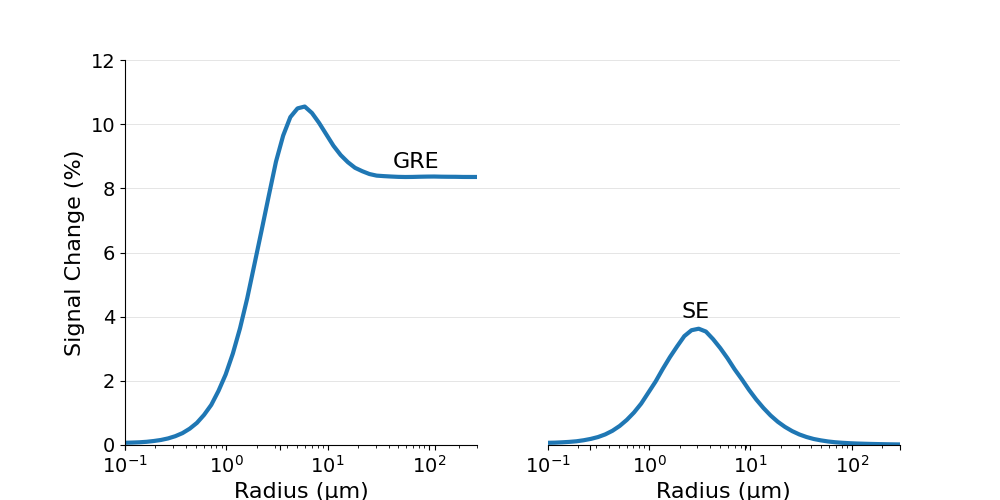

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none' # to embed fonts in SVG output

# Create data
x = radius * scales.squeeze()
x = x.reshape(-1)

plt.close('all')
BV   = [2, 5]
cmap = plt.get_cmap('Set2')
colors = cmap(np.linspace(0, 1, len(signal_change)))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, (ax, sig) in enumerate(zip(axs, signal_change)):
    ax.plot(x, sig, linewidth=3)
    ax.set_xlabel('Radius (µm)', fontsize=16)
    ax.set_xscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim([0.1, 300])
    ax.set_ylim([0, 12])
    ax.patch.set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if i == 0:
        ax.set_ylabel('Signal Change (%)', fontsize=16)
        ax.text(0.76, 0.72, 'GRE', transform=ax.transAxes, fontsize=16)
    if i == 1:
        ax.text(0.38, 0.33, 'SE', transform=ax.transAxes, fontsize=16)
    if i != 0:
        ax.set_yticklabels([])
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='y', left=False)

# shared axes for the grid
ax_g = fig.add_subplot(111, zorder=-1)
ax_g.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax_g.tick_params(labelleft=False, labelbottom=False, left=False, right=False )
ax_g.set_ylim([0, 12])
ax_g.yaxis.grid(True, linewidth=0.7, color='#e5e5e5')
ax_g.patch.set_visible(False)
